# 01. 컨텐츠 기반 추천
1. 정의
    - 컨텐츠 기반 추천 시스템은 사용자가 이전에 구매한 상품 중에서 좋아하는 상품들과 **유사한 상품**들을 추천하는 방법이다.
2. Represented Items
    - Items를 벡터 형태로 표현. 도메인에 따라 다른 방법이 적용

## 1. 유사도 함수
1. 유클라디안 유사도 
    - 유클라디안 유사도 = 1 / (유클라디안 거리 + 1e-05)
    - 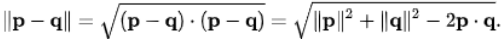
    - 장점 : 계산하기가 쉽다.
    - 단점 : p와 q의 분포가 다르거나 범위가 다른 경우에 상관성을 놓친다.

2. 코사인 유사도 
    - 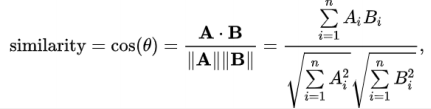
    - 장점 : 벡터의 크기가 중요하지 않은 경우에 거리를 측정하기 위한 메트릭으로 사용 (예 : 문서 내에서 단어의 빈도수 - 문서들의 길이가 고르지 않더라도 문서 내에서 얼마나 나왔는지라는 비율을 확인하기 때문에 상관없음.)
    - 단점 : 벡터의 크기가 중요한 경우에 대해서 잘 작동하지 않음.

3. 피어슨 유사도
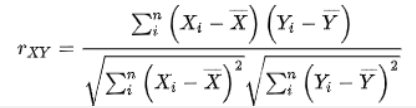

4. 자카드 유사도 
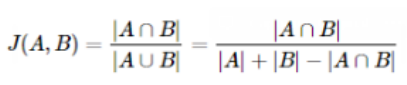

5. 그 외
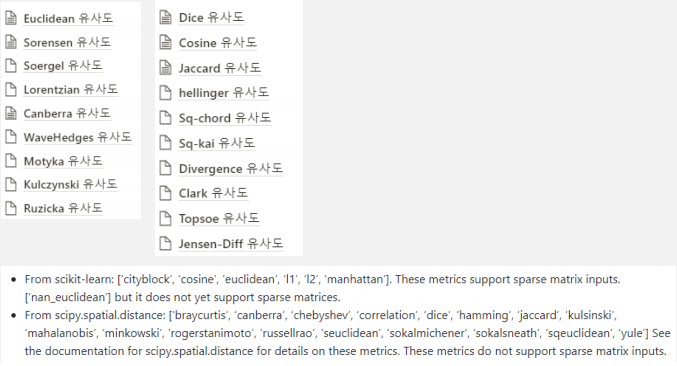

## 2. TF-IDF 알고리즘
TF-IDF는 특정 문서 내에서 특정 단어가 얼마나 자주 등장하는지를 의미하는 **단어 빈도(TF)**와 전체 문서에서 특정 단어가 얼마나 자주 등장하는지를 의미하는 역문서 빈도(DF)를 통해서 "다른 문서에서는 등장하지 않지만 특정 문서에서만 자주 등항하는 단어"를 찾아서 문서 내 단어의 가중치를 계산하는 방법이다.<br><br>
용도로는 문서의 핵심어를 추출, 문서들 사이의 유사도를 계산, 검색 결과의 중요도를 정하는 작업 등에 활용할 수 있다.

1. TF(d, t)
    - 특정 문서 d에서의 특정 단어 t의 등장 횟수
    
2. DF(t)
    - 특정 단어 t가 등장한 문서의 수

3. IDF(d, t)
    - DF(t)에 반비례하는 수
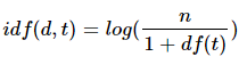

> **<p style="font-size:16px">$TF(d, t) * IDF(d, t) = TF-IDF(d, t)$</p>**

**<p style="font-size:20px">TF-IDF를 사용하는 이유</p>**  
> <p style="font-size:15px">{I like this movie. I love this movie. It was the best movie I've ever seen.}<br>  
{I don't like this movie. This is the worst movie I've ever seen.}</p>

1. Item이라는 컨텐츠를 벡터로 "Feature Extract" 과정을 수행해준다.
2. 빈도 수를 기반으로 많이 나오는 중요한 단어들을 잡아준다. 이러한 방법을 Counter Vectorizer 라고 한다.
3. 하지만, Couter Vectorizer는 단순 빈도만을 계산하기에 조사, 관사처럼 의미는 없지만 문장에 많이 등장하는 단어들도 높게 쳐주는 한계가 있다. 이러한 단어들에는 패널티를 줘서 적절하게 중요한 단어만을 잡아내는게 TF-IDF 기법이다.

In [1]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

In [2]:
docs

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer()

In [4]:
# 문장을 Counter Vectorizer 형태로 변환
countvect = vect.fit_transform(docs) 
countvect  # 4 X 9 : 4개의 문서에 9개의 단어

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [5]:
# toarray()를 통해서 문자이 Vector 형태의 값을 얻을 수 있음.
# 하지만, 각 인덱스와 컬럼이 무엇을 의미하는지에 대해서는 알 수가 없음
# sparse matrix -> numpy
countvect.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [6]:
vect.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [7]:
sorted(vect.vocabulary_)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [8]:
import pandas as pd
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = ['문서1', '문서2', '문서3', '문서4']
countvect_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0,0,0,1,0,1,1,0,0
문서2,0,0,0,1,1,0,1,0,0
문서3,0,1,1,0,2,0,0,0,0
문서4,1,0,0,0,0,0,0,1,1


In [9]:
# 위의 DataFrame 형태의 유사도를 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

0번 문서는 1번과 유사하다는 결론을 얻을 수 있음. 동일한 방식으로 TF-IDF를 수행하면 다음과 같다.

In [10]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfvect = vect.fit(docs)
tfvect

TfidfVectorizer()

In [11]:
tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
문서2,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
문서3,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
문서4,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

array([[1.        , 0.60784064, 0.        , 0.        ],
       [0.60784064, 1.        , 0.42980824, 0.        ],
       [0.        , 0.42980824, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

### 2.1 TF-IDF 장단점
1. 장점 
    - 직관적인 해석이 가능하다.
   
2. 단점
    - 대규모 말뭉치를 다룰 때 메모리상의 문제가 발생
        - 높은 차원을 가짐
        - 매우 sparse한 형태의 데이터임
        - 예) 100만개의 문서를 다루는 경우 : 100만개의 문서에 등장한 모든 단어를 추출해야하고 이때 단어의 수는 1문서당 새로운 단어가 10개면, 1000만개 정도의 말뭉치가 형성됨. 즉, 100만 X 1000만의 매트릭스가 형성